1/1 [==============================] - 0s 45ms/step
Convolution output shape: (1, 111, 111, 16)
Max pooling output shape: (1, 111, 111, 16)
Min pooling output shape: (1, 111, 111, 16)


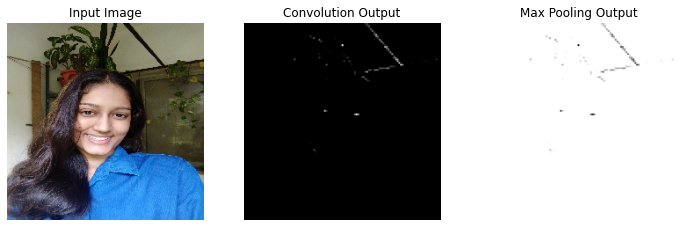

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = "306993360_184103247442009_4193669596921729456_n.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

# Define the convolution and pooling layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
])

# Get the output of the MaxPooling2D layer
max_pool_output = model.layers[1].output

# Apply the negative operation
neg_output = tf.keras.layers.Lambda(lambda x: tf.negative(x))(max_pool_output)

# Create a new model with the modified output
modified_model = tf.keras.Model(inputs=model.inputs, outputs=neg_output)

# Run the convolution and pooling operations
conv_output = model.predict(image_array)
max_pool_output = modified_model.predict(image_array)
min_pool_output = -max_pool_output

# Print the outputs
print("Convolution output shape:", conv_output.shape)
print("Max pooling output shape:", max_pool_output.shape)
print("Min pooling output shape:", min_pool_output.shape)

# Display the input and output images
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title("Input Image")
plt.imshow(image)
plt.axis('off')
plt.subplot(132)
plt.title("Convolution Output")
plt.imshow(conv_output[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Max Pooling Output")
plt.imshow(max_pool_output[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()
